### **Проектная работа по модулю “Математика и статистика в Python”**
1. Загрузить файл hr.csv
2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
3. Рассчитать и визуализировать корреляционную матрицу для переменных.
4. Визуализировать несколько взаимосвязей между переменными.
5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.
6. Рассчитать сколько работников работает в каждом департаменте.
7. Показать распределение сотрудников по зарплатам.
8. Показать распределение сотрудников по зарплатам совместно с департаментами.
9. Сколько сотрудников покинули компанию.
10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

In [52]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
#from scipy import stats
import scipy.stats as sts
import pandas as pd
import io
import requests
import seaborn as sns

In [34]:
df = pd.read_csv('hr.csv') 
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

**Вывод:** датасет полный, без пропусков.

**2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).**

In [4]:
df.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [5]:
df.mode().T

,0,1
satisfaction_level,0.1,NaN
last_evaluation,0.55,NaN
number_project,4,NaN
average_montly_hours,135,156
time_spend_company,3,NaN
Work_accident,0,NaN
left,0,NaN
promotion_last_5years,0,NaN
sales,sales,NaN
salary,low,NaN


**3. Рассчитать и визуализировать корреляционную матрицу для переменных.**

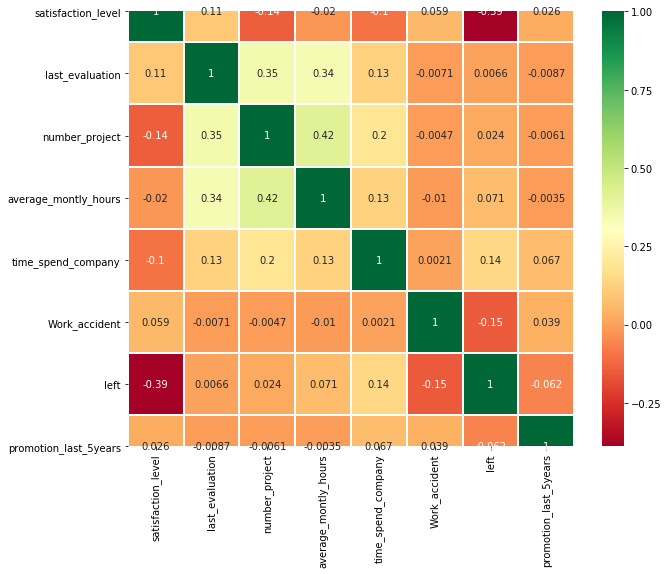

In [6]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=1) 
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

**4. Визуализировать несколько взаимосвязей между переменными.**

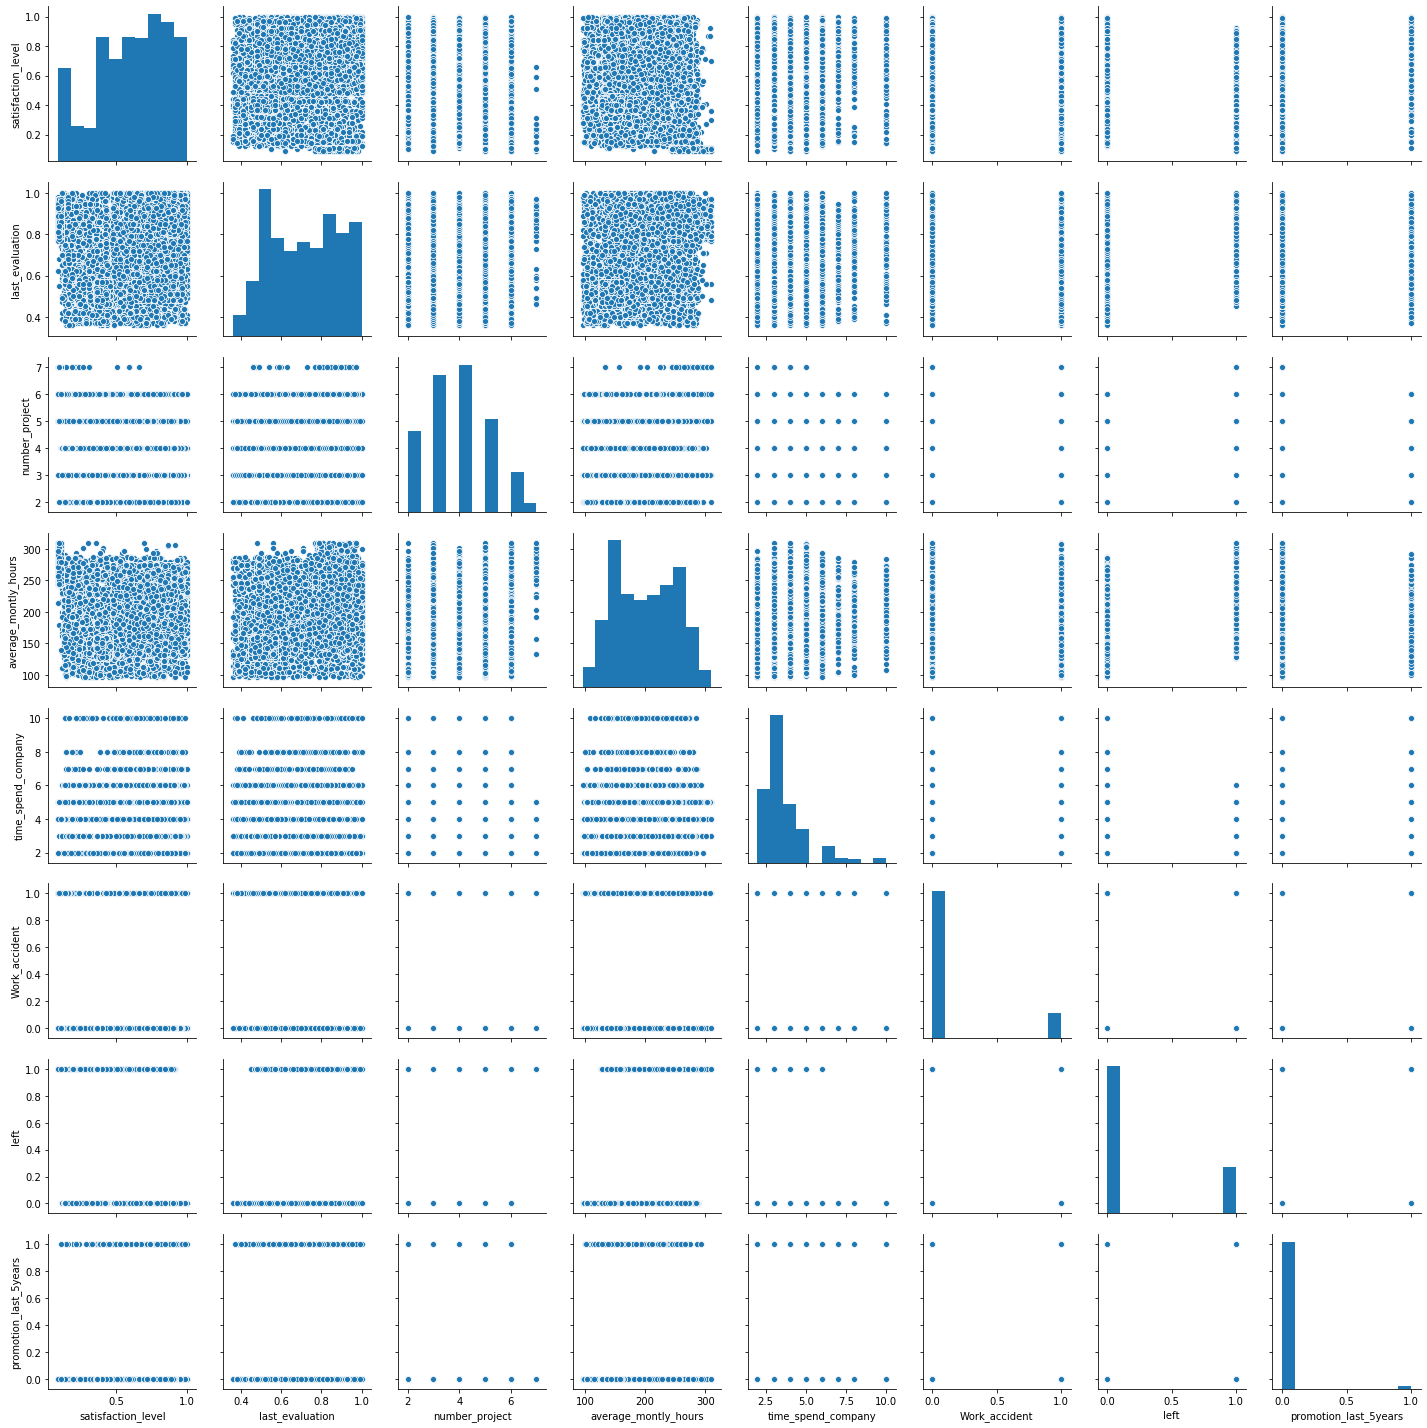

In [7]:
sns.pairplot(df)

**5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.**

##### Н0: Уровень удовлетворенности у сотрудников с высокой зарплатой такой же как и у вссех остальных.

In [7]:
happy_high = df.loc[df['salary'] == 'high']['satisfaction_level']
happy_other = df.loc[df['salary'] != 'high']['satisfaction_level']

In [8]:
len(happy_high), len(happy_other)

(1237, 13762)

In [9]:
happy_high = happy_high.sample(100)
happy_other = happy_other.sample(100)

In [10]:
sts.ttest_ind(happy_high, happy_other, equal_var=False)

Ttest_indResult(statistic=1.9060809988341858, pvalue=0.058099068585961824)

**Вывод:** pvalue>0.05, гипотеза подтверждается. Уровень удовлетворенности у сотрудников с высокой зарплатой такой же как и у вссех остальных.

##### Н0: Уровень удовлетворенности у сотрудников, отработавших 3 года и меньше, такой же как и сотрудников отработавших больше 3-х лет

In [11]:
happy_3year = df.loc[df['time_spend_company'] <= 3]['satisfaction_level']
happy_up3year = df.loc[df['time_spend_company'] > 3]['satisfaction_level']

In [12]:
len(happy_3year), len(happy_up3year)

(9687, 5312)

In [13]:
happy_3year = happy_3year.sample(100)
happy_up3year = happy_up3year.sample(100)

In [14]:
sts.ttest_ind(happy_3year, happy_up3year, equal_var=False)

Ttest_indResult(statistic=3.777309195084495, pvalue=0.00021805556135303078)

**Вывод:** pvalue<0.05, гипотеза отвергается. Уровень удовлетворенности у сотрудников, отработавших 3 года и меньше, **не** такой же как и сотрудников отработавших больше 3-х лет.

**6. Рассчитать сколько работников работает в каждом департаменте.**

Text(0.5, 0, 'Количество сотрудников по отделам')

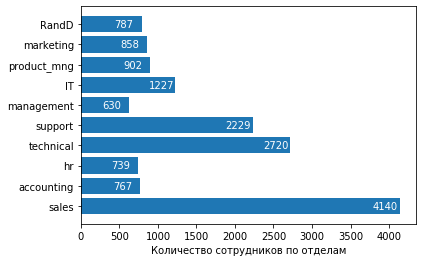

In [15]:
from collections import Counter
d1 = Counter(df['sales'])
df_sales = pd.DataFrame([d1], columns=d1.keys()).T.reset_index() #переводим из словоря в датафрейм

plt.barh(df_sales['index'], df_sales[0])

for i in range(len(df_sales)):
    plt.annotate(s=df_sales[0][i], xy=(df_sales[0][i]-350, i-0.15), color='white')

plt.xlabel('Количество сотрудников по отделам')

**7. Показать распределение сотрудников по зарплатам.**

Text(0.5, 0, 'Распределение сотрудников по зарплате')

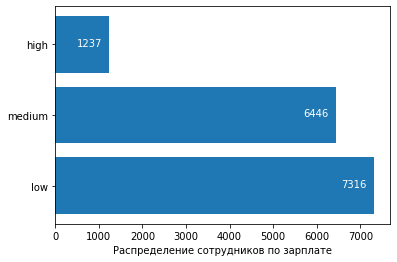

In [16]:
from collections import Counter
d3 = Counter(df['salary'])
df_salary = pd.DataFrame([d3], columns=d3.keys()).T.reset_index()

plt.barh(df_salary['index'], df_salary[0])

for i in range(len(df_salary)):
    plt.annotate(s=df_salary[0][i], xy=(df_salary[0][i]-750, i-0.02), color='white')

plt.xlabel('Распределение сотрудников по зарплате')

Text(0.5, 1.0, 'Распределение сотрудников по зарплате')

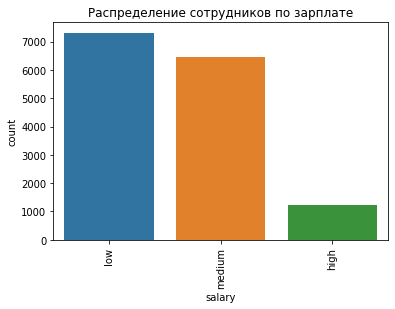

In [17]:
sns.countplot(x='salary', data=df) # второй график просто для тренировки
plt.xticks(rotation=90)
plt.title('Распределение сотрудников по зарплате')

**8. Показать распределение сотрудников по зарплатам совместно с департаментами.**

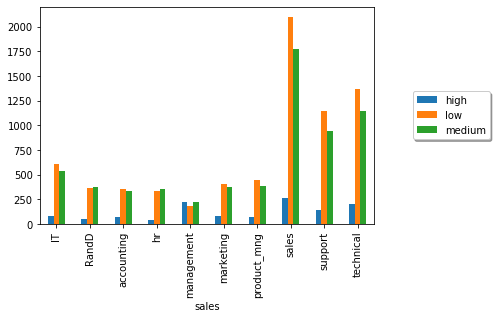

In [18]:
df4 = pd.crosstab(df['sales'], df['salary'])
df4.plot(kind='bar', rot=90, stacked=False).legend(loc='center left', bbox_to_anchor=(1.1, 0.5), shadow=True, ncol=1)

**9. Сколько сотрудников покинули компанию.**

Text(0.5, 0, 'Количество сотрудников в компании')

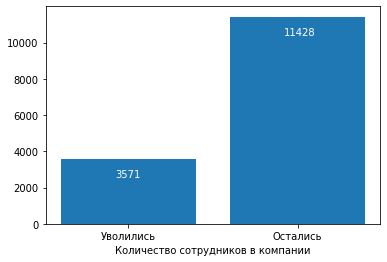

In [19]:
from collections import Counter
d2 = Counter(df['left'])
df_left = pd.DataFrame([d2], columns=d2.keys())
df_left.columns = ['Уволились', 'Остались']
df_left = df_left.T.reset_index()

plt.bar(df_left['index'], df_left[0])

for i in range(len(df_left)):
    plt.annotate(s=df_left[0][i], xy=(i-0.08, df_left[0][i]-1000), color='white')

plt.xlabel('Количество сотрудников в компании')

**10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.**

In [20]:
# Разобьем данные на две таблицы работающие и уволенные
#df_work = df.query('left == 0')
#df_fired = df.query('left == 1')

In [50]:
df.groupby(['left']).mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


**Вывод:** проанализировав средние величины среди ушедших из компании и оставшихся, стОит обратить внимание на уровень продвижения за последние пять лет, наличия инцедентов на рабочем месте и уровень удовлетворенности.

In [56]:
from sklearn.linear_model import LogisticRegression

In [67]:
X = df[['satisfaction_level', 'Work_accident', 'promotion_last_5years']]
y = df['left']

In [44]:
#X = df.drop(['left', 'sales', 'salary'], axis=1)
#y = df['left']

In [68]:
# Разделим датасет на тренировочные данные и на тестовые данные
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [71]:
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)
y_predicted = clf.predict(X_test)
print(y_predicted)
print(y_test)
print(clf.score(X_test, y_test))

[0 0 0 ... 0 0 0]
13982    0
822      1
13751    0
9656     0
13497    0
        ..
3876     0
11504    0
2435     0
5161     0
5184     0
Name: left, Length: 3000, dtype: int64
0.766


In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86      2266
           1       0.55      0.26      0.35       734

    accuracy                           0.77      3000
   macro avg       0.67      0.59      0.60      3000
weighted avg       0.73      0.77      0.73      3000



Логистическая регрессия дает неплохие результаты

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

estimator = LinearRegression()
estimator.fit(X_train, y_train) # Обучение


y_pred = estimator.predict(X_test)

print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: \t", mean_absolute_error(y_test, y_pred))

R2: 	 0.17656738692654728
RMSE: 	 0.39009533779132355
MAE: 	 0.3098486478080859


In [73]:
reg = LinearRegression().fit(X_train, y_train)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X_train)
print('Error: {}'.format(mean_absolute_error(pred_values, y_train)))

Weights: [-0.65253661 -0.15032309 -0.12185746]
Bias: 0.6610184076214951
Error: 0.30737345902173235


Линейная регрессия дает слабые результаты